In [1]:
#imports
#input
import matplotlib.pyplot as plt
import skimage
from skimage import io
from glob import glob

#image represenation
import numpy as np
from numpy import ma
import pandas as pd 

#image processing
from skimage import measure, filters, morphology, feature,segmentation, draw
from skimage.morphology import disk, square

#plotting
import seaborn as sns
import tabulate


In [2]:
radrat = 1

./tchakamau/Scans_of_balls\FG-w1x-01.21_001.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_001_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_002.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_002_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_003.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_003_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_004.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_004_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_005.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_005_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_006.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_006_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_007.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_007_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_008.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_008_C.tif
[            1           2           3           4           5           6     \
0     324.586639  324.215242  337.671239  327.286409  322.472533  334.485796   
1     334.128684  332.614527  333.128769  340.6

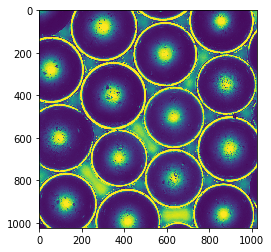

In [3]:
filenames = glob('./tchakamau/Scans_of_balls/FG-w*.csv')
filenames2 = glob('./tchakamau/Scans_of_balls/FG*_*[1-9]*_C.tif')
[print(i, z) for i,z in zip(filenames, filenames2)]
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]
intensities = [io.imread(filename2, as_gray=True) for filename2 in filenames2]

print(tables, len(tables))
plt.imshow(intensities[1])

In [4]:
def vector_dist(a, b):
    sqdist = np.square(np.subtract(a, b))
    return np.abs(np.around(np.sqrt(sqdist), 6))
    
print(vector_dist((0,3), (4, 0)))

def curve_heights(distance,radius):
    if distance <= radius:
        angle = np.arcsin(np.divide(distance,radius))
        height = np.multiply(radius, np.cos(angle))
        return np.around(height, 6)
    else:
        print(distance, radius, "Could not compute angle")
    
print(curve_heights(0, 5), curve_heights(10, 10))

5.0
5.0 0.0


[[0.18633059 0.2009149  0.23904431 ... 0.08801569 0.09138667 0.10595686]
 [0.18414392 0.18165804 0.18664235 ... 0.07568549 0.08550078 0.09612667]
 [0.1664549  0.17013843 0.1869102  ... 0.07733725 0.08660196 0.08578353]
 ...
 [0.39129529 0.37928549 0.33820275 ... 0.03082196 0.02801647 0.0288498 ]
 [0.30951333 0.33615451 0.31399333 ... 0.02773373 0.02856706 0.02940039]
 [0.40232235 0.39052078 0.34790353 ... 0.02829922 0.02829922 0.02913255]] 1024
[[0.02661765 0.03025647 0.02801647 ... 0.02773373 0.02801647 0.02998863]
 [0.02745098 0.02745098 0.02184    ... 0.02745098 0.02856706 0.02856706]
 [0.02661765 0.0263349  0.0263349  ... 0.0310898  0.02661765 0.03251137]
 ...
 [0.02773373 0.02773373 0.02773373 ... 0.03110471 0.02829922 0.03165529]
 [0.02773373 0.02690039 0.02690039 ... 0.03053922 0.03082196 0.03165529]
 [0.02773373 0.02690039 0.02718314 ... 0.03137255 0.03165529 0.03446078]] 1024


'     #collect image from circle mask\n        circle = np.ones_like(image)\n        circle[coords] = 0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[0][ind].imshow(ball_cap)\n        ax[1][ind].imshow(normal_cap)\n        ind +=1\n    #show subtraction fo that fom the cap as wll a the cap\n    \n    \n    for radius, center in zip(radii, centers):\n        circle = np.ones_like(image)\n        coords=draw.circle(center[0], center[1], radius)\n        circle[coords]=0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[ind].imshow(ball_cap)\n        ind +=1\n        '

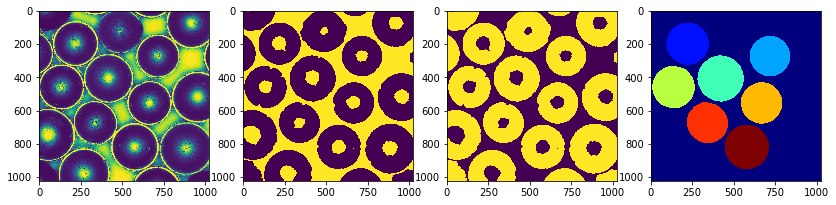

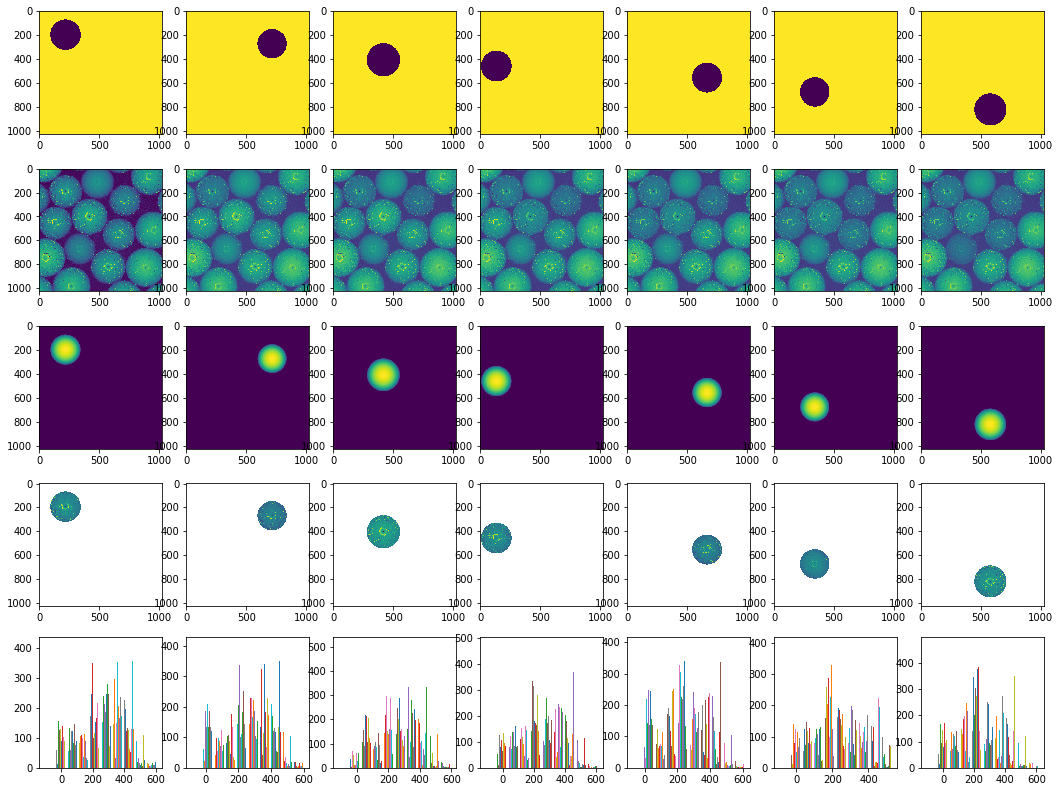

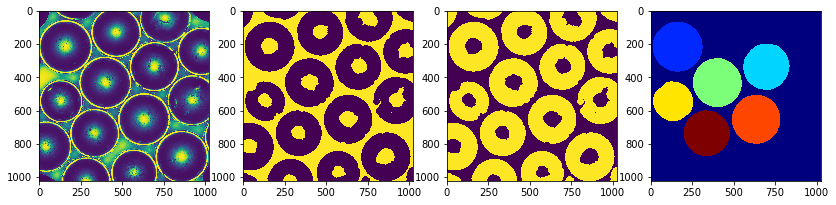

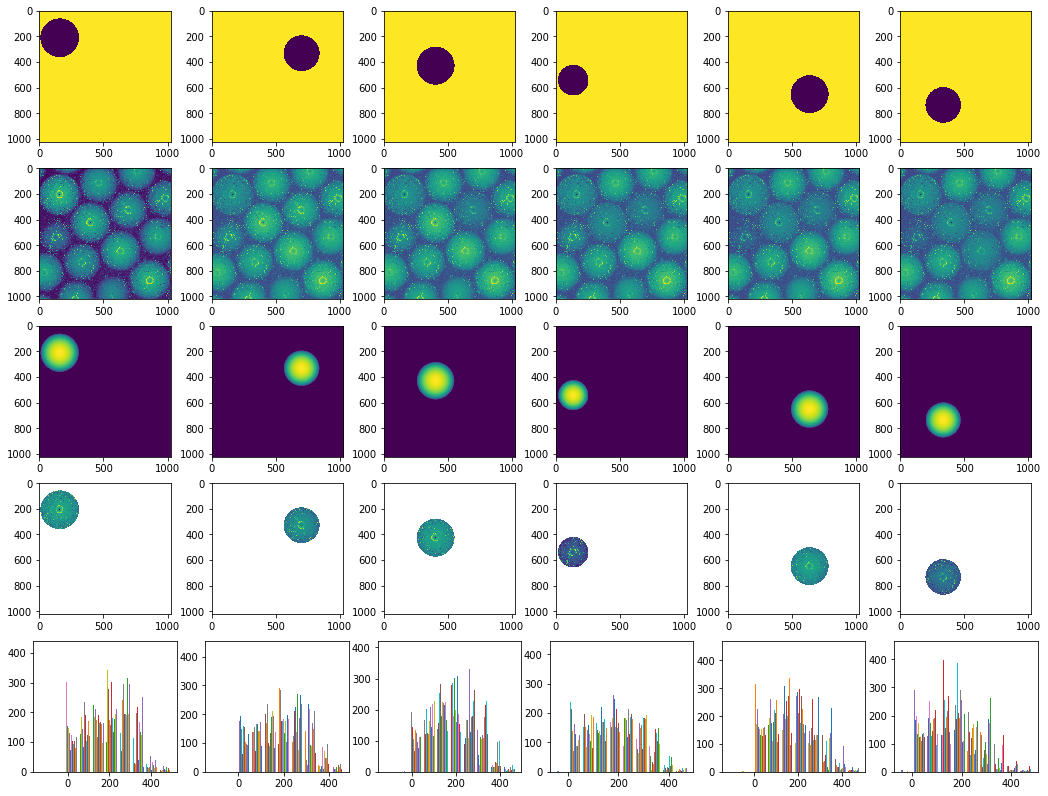

In [5]:
wroughs = []
wmeans = []

for table, intensity in zip(tables[2:4], intensities[2:4]):
    intense = np.ascontiguousarray(np.fliplr(np.rot90(intensity, k=3)))
    image = np.array(table, copy=True)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(intense)
    print(intense, len(intense))
       
    bw_balls = intense  > filters.threshold_isodata(intense)
    inverse = morphology.closing(bw_balls, disk(20))
    filled_balls =np.invert(inverse)#morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    inner_balls = segmentation.clear_border(filled_balls)
    labeled_balls = measure.label(morphology.convex_hull_object(inner_balls))
    
    ax[1].imshow(inverse)
    ax[2].imshow(filled_balls)#(filled_balls)
    ax[3].imshow(labeled_balls, cmap='jet')
    
    # collect radii in a list
    regions = measure.regionprops(labeled_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    piece_radii = [x/radrat for x in radii] # use 1/radrat of a radius
    
    ##Plot image of the circular region for each ball collected, varying in intensity 
    #make function that takes centers and circles and makes the map
    #by making the circles and setting them to 1
    fig, ax = plt.subplots(nrows = 5, ncols = len(regions), figsize=(18, 14))
    ind = 0
    #blank = np.zeros_like(image)
    for center, radius in zip(centers, piece_radii): # per ball
        coords = draw.circle(center[0], center[1], radius)
        blank = np.zeros_like(image)
        circle = np.ones_like(image)
        circle[coords] = 0
        #circle[image > filters.threshold_minimum(image)] = 1
        #print(len(coords))
        #print(list(coords))
        
        #Set heights of circle mask 
        for row, column in zip(coords[0], coords[1]):
            #print(row, column)
            #print(center)
            distance= vector_dist((row, column), center)
            #print(distance)      
            curve_height = curve_heights(distance, radius)
            blank[(row, column)] = curve_height #set the heights of the mask
        
        ax[0][ind].imshow(circle)
        ax[1][ind].imshow(image)
        image = image - blank
        #ax[2][ind].imshow(image)
        ball_cap = ma.masked_array(image, circle)
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[2][ind].imshow(blank)
        ax[3][ind].imshow(ball_cap)
        ax[4][ind].hist(ball_cap)
        ind += 1
"""     #collect image from circle mask
        circle = np.ones_like(image)
        circle[coords] = 0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[0][ind].imshow(ball_cap)
        ax[1][ind].imshow(normal_cap)
        ind +=1
    #show subtraction fo that fom the cap as wll a the cap
    
    
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        """
        

[75.9582778417491, 64.33292398710276, 66.431589960157, 76.4181757418277, 67.49407653576917, 41.923662808745, 65.5904231000896, 59.934343594513074, 61.73113507316962, 56.55479658229849, 78.7113663514297, 53.14918079448333, 58.4659794639878] 13


Text(0.5, 0, "Mean value - 'Intensity'")

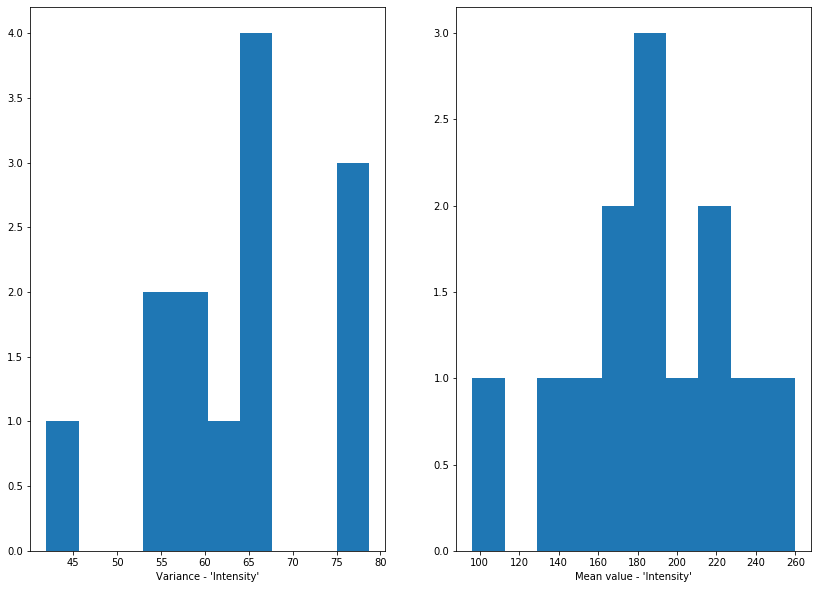

In [6]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(wroughs, len(wroughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(wroughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(wmeans)
ax[1].set_xlabel("Mean value - 'Intensity'")

./tchakamau/Scans_of_balls\FG-S-w0x-01.17_001.csv ./tchakamau/Scans_of_balls\G_001_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_002.csv ./tchakamau/Scans_of_balls\G_002_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_003.csv ./tchakamau/Scans_of_balls\G_003_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_004.csv ./tchakamau/Scans_of_balls\G_004_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_005.csv ./tchakamau/Scans_of_balls\G_005_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_006.csv ./tchakamau/Scans_of_balls\G_006_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_007.csv ./tchakamau/Scans_of_balls\G_007_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_008.csv ./tchakamau/Scans_of_balls\G_008_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_009.csv ./tchakamau/Scans_of_balls\G_009_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_010.csv ./tchakamau/Scans_of_balls\G_010_C.tif
[            1           2          3           4           5          6     \
0      67.369776   74.643921  4

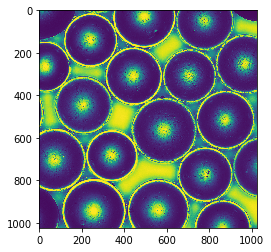

In [7]:
filenames = glob('./tchakamau/Scans_of_balls/FG-S*.csv')
filenames2 = glob('./tchakamau/Scans_of_balls/G*_*[1-9]*_C.tif')
[print(i, z) for i,z in zip(filenames, filenames2)]
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]
intensities = [io.imread(filename2, as_gray=True) for filename2 in filenames2]

print(tables, len(tables))
plt.imshow(intensities[1])

[[0.16117137 0.15497294 0.13955451 ... 0.94455451 0.94233725 0.94012784]
 [0.17572667 0.16581412 0.16050157 ... 0.95941529 0.95353647 0.93729961]
 [0.17237059 0.16055412 0.13111608 ... 0.95967529 0.95073098 0.93817059]
 ...
 [0.49090196 0.49337294 0.51831765 ... 0.06698706 0.06418157 0.07005255]
 [0.46926235 0.46572235 0.49140941 ... 0.07005255 0.06641373 0.06921922]
 [0.44879216 0.45278902 0.42309725 ... 0.07706235 0.07145137 0.08267333]] 1024
[[0.08380431 0.08968314 0.08407216 ... 0.07341569 0.0683702  0.07343059]
 [0.08573882 0.08573882 0.0865949  ... 0.08351373 0.08241255 0.08383412]
 [0.07846118 0.07817843 0.07537294 ... 0.08548588 0.08913961 0.09922275]
 ...
 [0.05716392 0.05743176 0.06865373 ... 0.50013843 0.46292392 0.43350157]
 [0.0650149  0.0675149  0.07172706 ... 0.47686196 0.3862451  0.42611804]
 [0.0650149  0.07256039 0.06837098 ... 0.48053922 0.41715961 0.4730149 ]] 1024


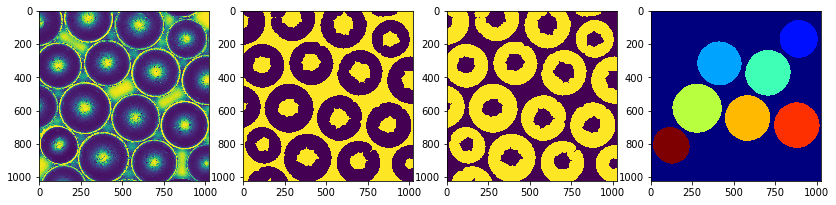

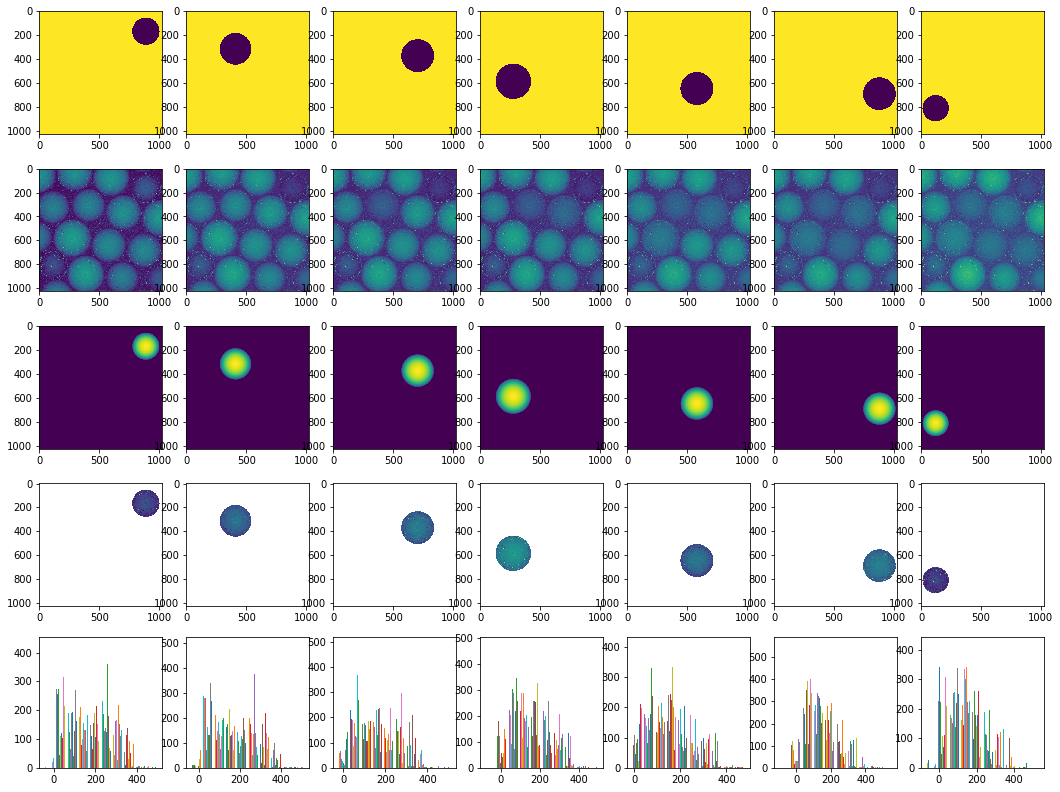

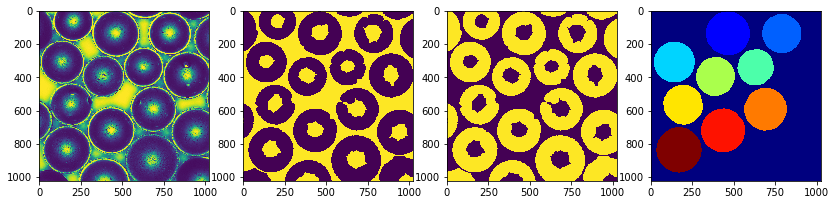

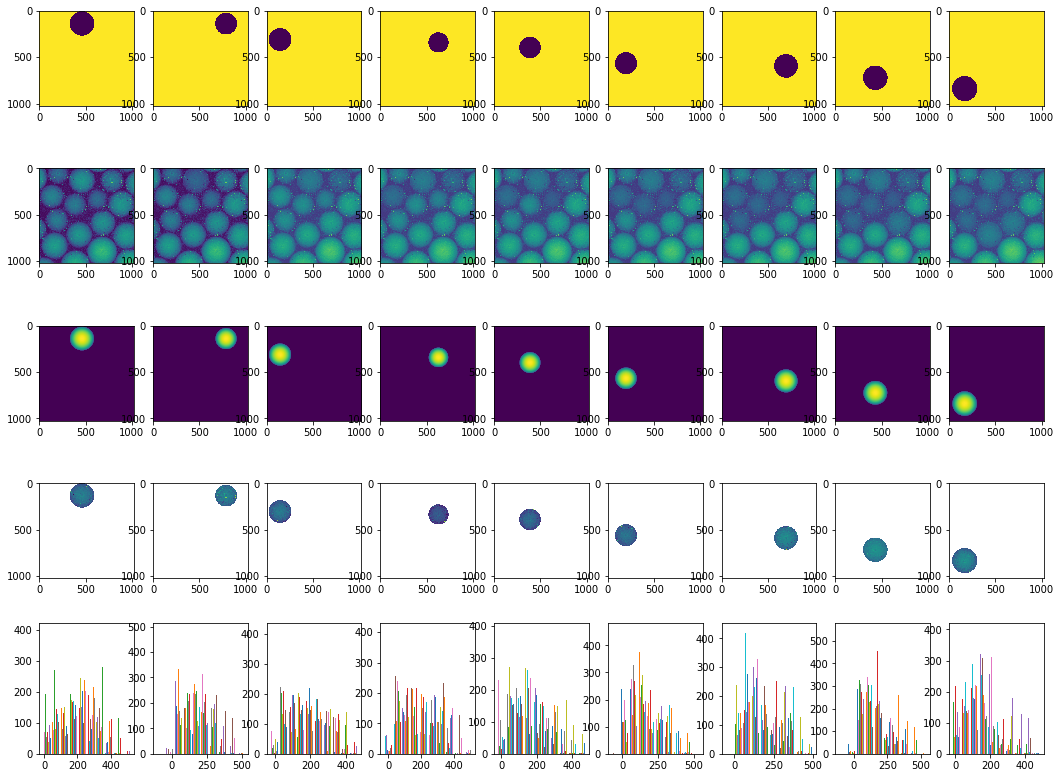

In [8]:
roughs = []
means = []

for table, intensity in zip(tables[2:4], intensities[2:4]):
    intense = np.ascontiguousarray(np.fliplr(np.rot90(intensity, k=3)))
    image = np.array(table, copy=True)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(intense)
    print(intense, len(intense))
       
    bw_balls = intense  > filters.threshold_isodata(intense)
    inverse = morphology.closing(bw_balls, disk(20))
    filled_balls =np.invert(inverse)#morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    inner_balls = segmentation.clear_border(filled_balls)
    labeled_balls = measure.label(morphology.convex_hull_object(inner_balls))
    
    ax[1].imshow(inverse)
    ax[2].imshow(filled_balls)#(filled_balls)
    ax[3].imshow(labeled_balls, cmap='jet')
    
    # collect radii in a list
    regions = measure.regionprops(labeled_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    piece_radii = [x/radrat for x in radii] # use 1/radrat of a radius
    
    ##Plot image of the circular region for each ball collected, varying in intensity 
    #make function that takes centers and circles and makes the map
    #by making the circles and setting them to 1
    fig, ax = plt.subplots(nrows = 5, ncols = len(regions), figsize=(18, 14))
    ind = 0
    #blank = np.zeros_like(image)
    for center, radius in zip(centers, radii): # per ball
        coords = draw.circle(center[0], center[1], radius)
        blank = np.zeros_like(image)
        circle = np.ones_like(image)
        circle[coords] = 0
        #circle[image > 375] = 1
        #print(len(coords))
        #print(list(coords))
        
        #Set heights of circle mask 
        for row, column in zip(coords[0], coords[1]):
            #print(row, column)
            #print(center)
            distance= vector_dist((row, column), center)
            #print(distance)      
            curve_height = curve_heights(distance, radius)
            blank[(row, column)] = curve_height #set the heights of the mask
        
        ax[0][ind].imshow(circle)
        ax[1][ind].imshow(image)
        image = image - blank
        #ax[2][ind].imshow(image)
        ball_cap = ma.masked_array(image, circle)
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        roughs.append(roughness)
        means.append(mean)
        ax[2][ind].imshow(blank)
        ax[3][ind].imshow(ball_cap)
        ax[4][ind].hist(ball_cap)
        ind += 1

[44.505444098454305, 39.96414479237552, 43.929888900535445, 45.20702169957252, 38.346922578244985, 47.229880015370085, 60.97397016967578, 39.46437085897015, 54.62114664676279, 39.620082622002855, 40.303028452981636, 36.144754796697015, 39.924193958891955, 40.070735796731746, 38.07138142115814, 39.5613291207561] 16


Text(0.5, 0, "Mean value - 'Intensity'")

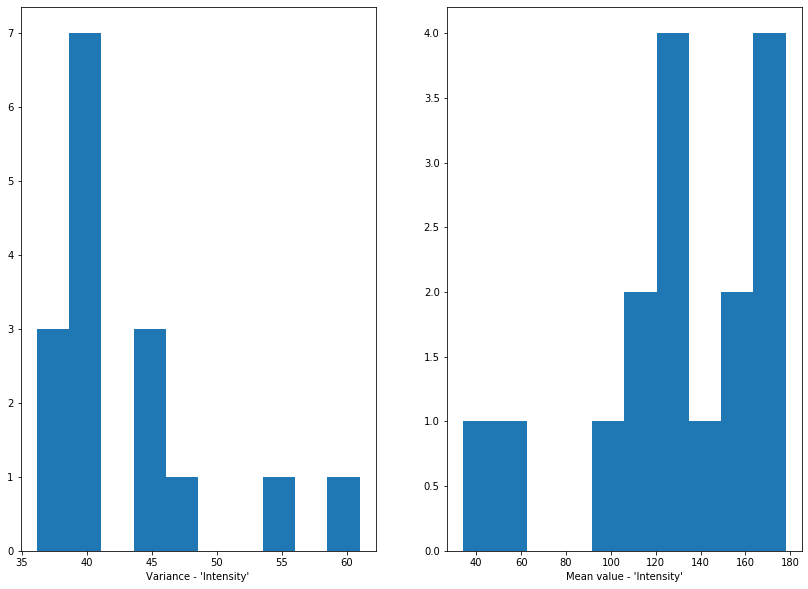

In [9]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(roughs, len(roughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(roughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(means)
ax[1].set_xlabel("Mean value - 'Intensity'")

Text(0, 0.5, 'Frequency')

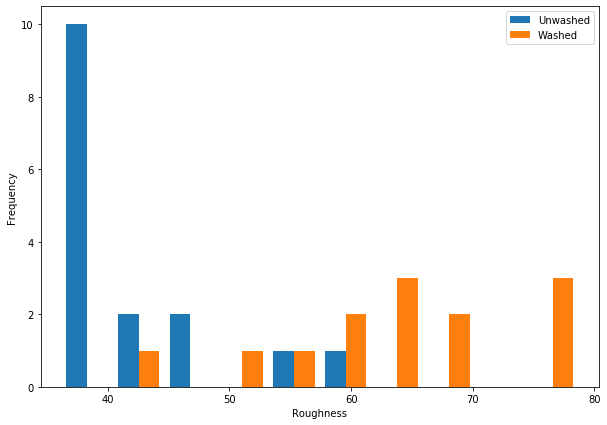

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist((roughs, wroughs), label = ("Unwashed", "Washed"))
ax.legend(prop={'size': 10})
ax.set_xlabel("Roughness")
ax.set_ylabel("Frequency")